In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance

  Using cached yfinance-0.2.50-py2.py3-none-any.whl.metadata (5.5 kB)
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached lxml-5.3.0-cp312-cp312-win_amd64.whl.metadata (3.9 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached frozendict-2.4.6-py312-none-any.whl.metadata (23 kB)
  Using cached peewee-3.17.8.tar.gz (948 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using c

In [1]:
pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 598.5 kB/s eta 0:00:13
   -- ------------------------------------- 0.5/7.8 MB 598.5 kB/s eta 0:00:13
   ---- ----------------------------------- 0.8/7.8 MB 644.9 kB/s eta 0:00:11
   ------ --------------------------------- 1.3/7.8 MB 944.7 kB/s eta 0:00:07
   --------- ------------------------------ 1.8/7.8 MB 1.2 MB/s eta 0:00:05
   --------- ------------------------------ 1.8/7.8 MB 1.2 MB/s eta 0:00:05
   ------------- -------------------------- 2.6/7.8 MB 1.3 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/7.8 MB 1.4 MB/s eta 0:00:04
   ---------------- ----------------------- 3.1/7.8 MB 1.4 MB/s eta 0:00:04
   ------------------ ----------

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install --upgrade yfinance

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install scikit-learn

In [ ]:
pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Initialize Spark Session
spark = (
    SparkSession.builder
    .appName("StockDataAnalysis")
    .master("spark://172.17.6.255:7077")
    .getOrCreate()
)

# Set up plotting styles
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA']
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "TESLA"]

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Dictionary to store Spark DataFrames for each stock
spark_dfs = {}
pandas_dfs = {}

# Load data from CSV files for each stock using Spark
for stock, name in zip(tech_list, company_name):
    # Adjust file path as needed, using the stock ticker
    file_path = f"hdfs://localhost:9000/{stock}.csv"
    try:
        # Read the CSV file into a Spark DataFrame
        data = spark.read.csv(file_path, header=True, inferSchema=True)
        # Add the company name as a new column
        data = data.withColumn("company_name", F.lit(name))
        # Store the Spark DataFrame in the dictionary
        spark_dfs[stock] = data
        # Convert to Pandas DataFrame for analysis
        pandas_dfs[stock] = data.toPandas()
    except Exception as e:
        print(f"Error loading data for {stock}: {e}")

# Example: Access and display the last few rows for AAPL using Spark
if 'AAPL' in spark_dfs:
    print("Last 10 rows for Apple (AAPL):")
    spark_dfs['AAPL'].orderBy("Date", ascending=False).show(10)

# Example: Analyze AAPL with Pandas
if 'AAPL' in pandas_dfs:
    print("\nPandas DataFrame for AAPL:")
    print(pandas_dfs['AAPL'].tail())

Error loading data for AAPL: An error occurred while calling o28.csv.
: java.net.ConnectException: Call From LAPTOP-RyanS/172.17.6.255 to localhost:9000 failed on connection exception: java.net.ConnectException: Connection refused: no further information; For more details see:  http://wiki.apache.org/hadoop/ConnectionRefused
	at sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
	at sun.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
	at sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
	at java.lang.reflect.Constructor.newInstance(Constructor.java:423)
	at org.apache.hadoop.net.NetUtils.wrapWithMessage(NetUtils.java:913)
	at org.apache.hadoop.net.NetUtils.wrapException(NetUtils.java:828)
	at org.apache.hadoop.ipc.Client.getRpcResponse(Client.java:1616)
	at org.apache.hadoop.ipc.Client.call(Client.java:1558)
	at org.apache.hadoop.ipc.Client.call(Client.java:1455)
	at org.apach

In [2]:
print("\nSummary statistics for Apple (AAPL):")
print(pandas_dfs['AAPL'].describe())


Summary statistics for Apple (AAPL):
              Open         High          Low        Close        Volume  \
count  1692.000000  1692.000000  1692.000000  1692.000000  1.692000e+03   
mean    132.441572   134.769698   129.996223   132.428658  4.270741e+06   
std      94.309923    95.694914    92.855227    94.313187  4.295971e+06   
min      16.139999    16.629999    14.980000    15.800000  1.185000e+05   
25%      30.000000    30.650000    29.215000    29.884999  1.194350e+06   
50%     156.334999   162.370002   153.150002   158.160004  3.180700e+06   
75%     220.557495   224.099999   217.119999   220.022503  5.662100e+06   
max     287.670013   291.420013   280.399994   286.040009  3.716390e+07   

         Adj Close  
count  1692.000000  
mean    132.428658  
std      94.313187  
min      15.800000  
25%      29.884999  
50%     158.160004  
75%     220.022503  
max     286.040009  


In [3]:
# General info
print("\nGeneral information for Apple (AAPL):")
pandas_dfs['AAPL'].info()


General information for Apple (AAPL):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1692 non-null   object 
 1   Open          1692 non-null   float64
 2   High          1692 non-null   float64
 3   Low           1692 non-null   float64
 4   Close         1692 non-null   float64
 5   Volume        1692 non-null   int32  
 6   Adj Close     1692 non-null   float64
 7   company_name  1692 non-null   object 
dtypes: float64(5), int32(1), object(2)
memory usage: 99.3+ KB


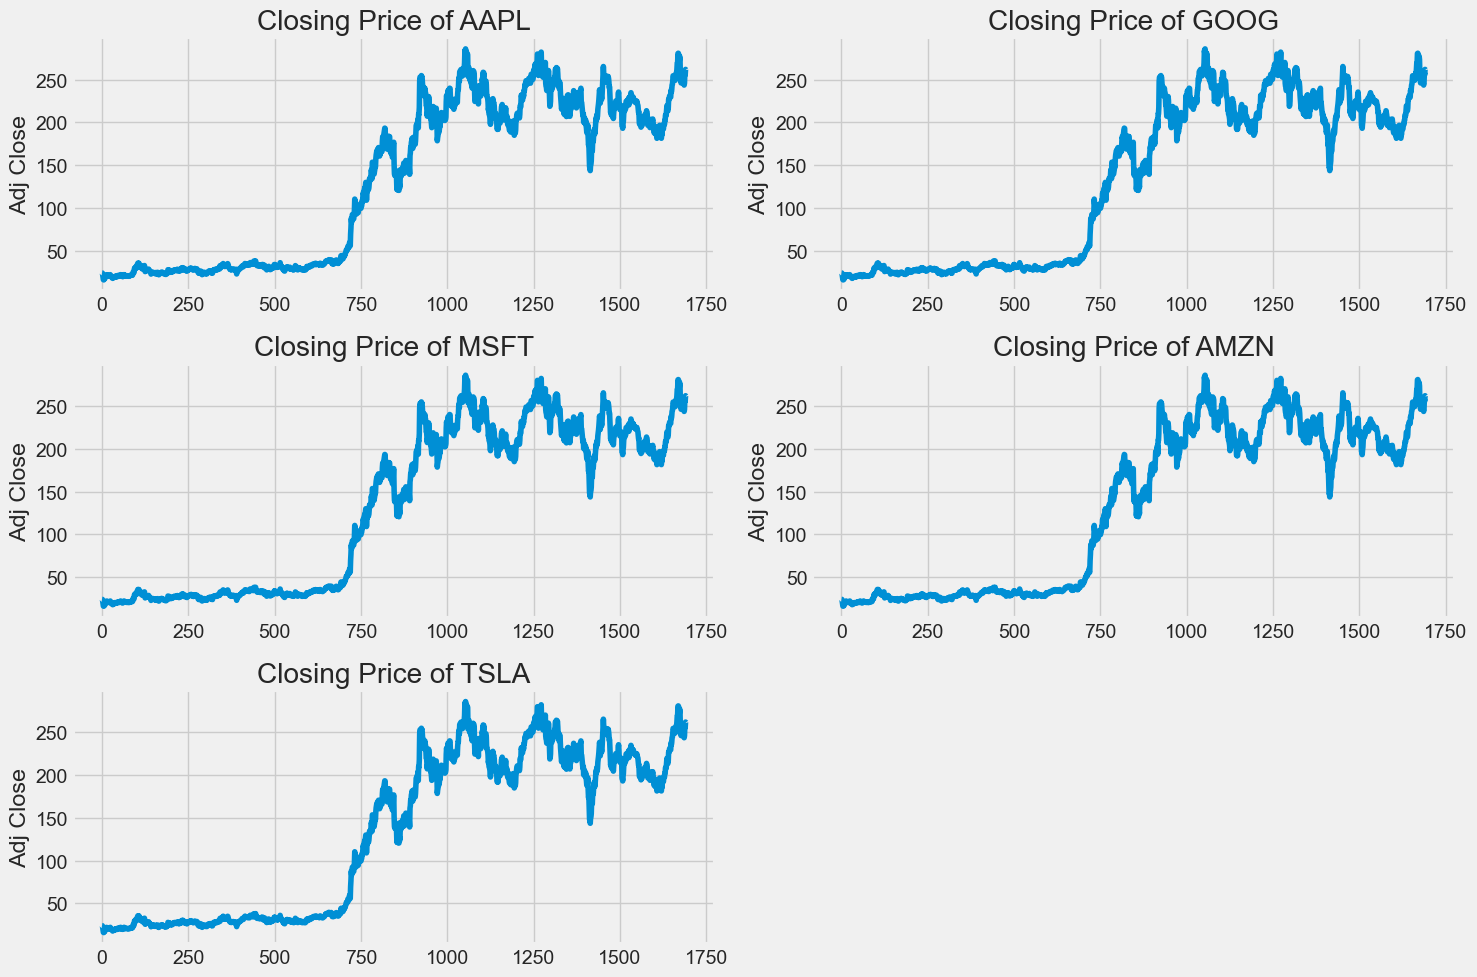

In [4]:
# Let's see a historical view of the closing price
import math

plt.figure(figsize=(15, 10))

# Calculate the number of rows and columns needed for subplots
num_plots = len(pandas_dfs)
cols = 2  # Fix the number of columns
rows = math.ceil(num_plots / cols)  # Dynamically calculate rows

# Iterate through the Pandas DataFrames stored in pandas_dfs
for i, (ticker, company_df) in enumerate(pandas_dfs.items(), 1):
    plt.subplot(rows, cols, i)  # Adjust subplot to dynamically fit the grid
    company_df['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {ticker}")

plt.tight_layout()
plt.show()

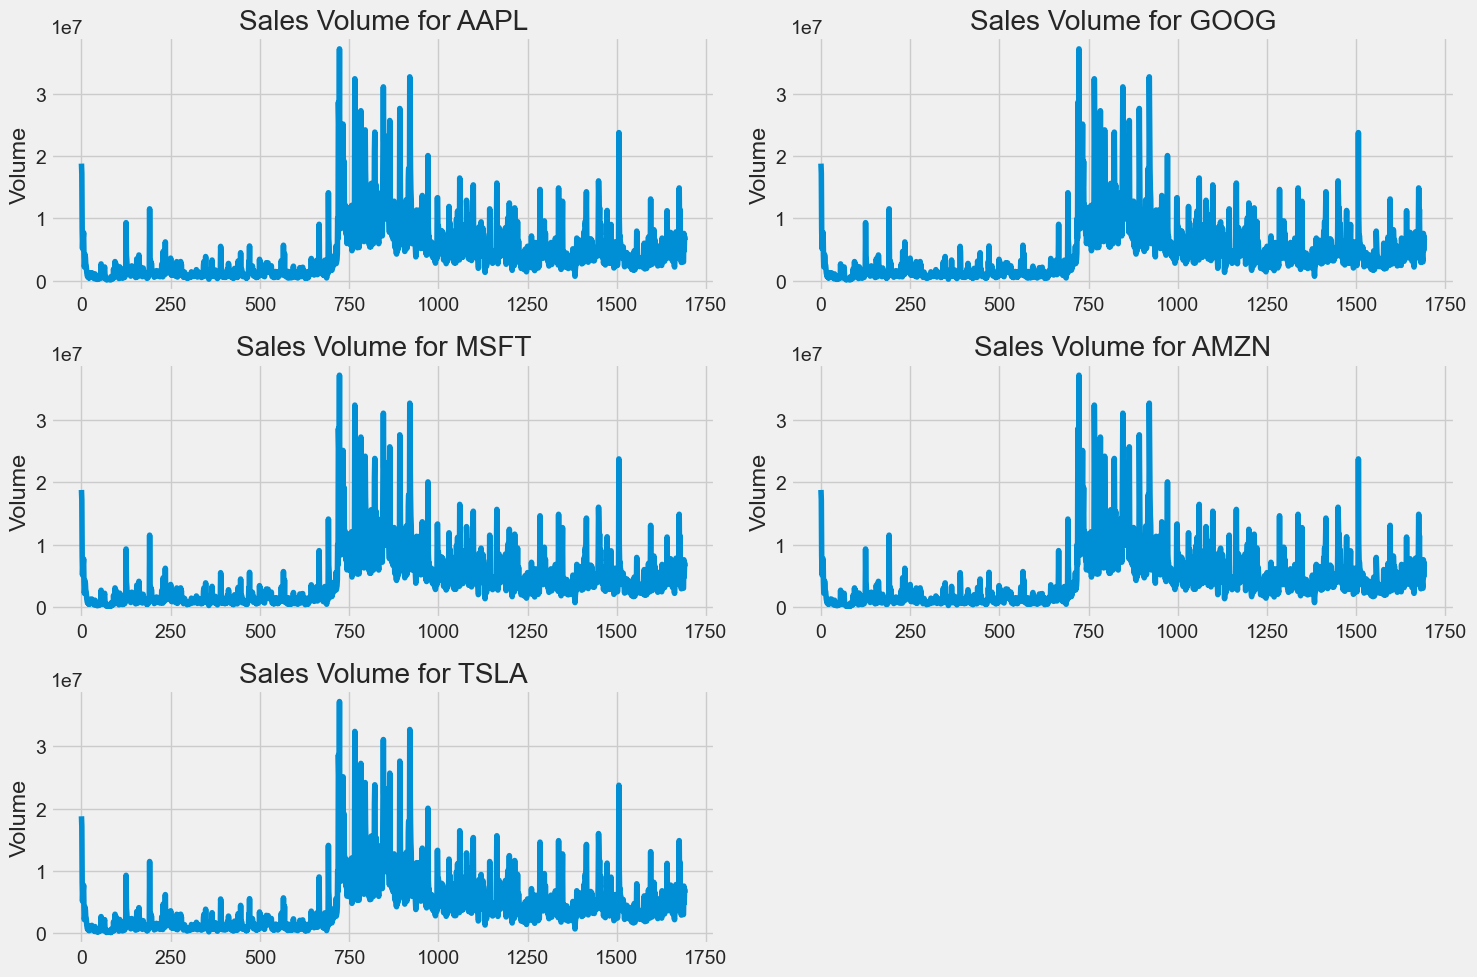

In [5]:
# Now let's plot the total volume of stock being traded each day
import math

plt.figure(figsize=(15, 10))

# Calculate the number of rows and columns needed for subplots
num_plots = len(pandas_dfs)
cols = 2  # Fixed number of columns
rows = math.ceil(num_plots / cols)  # Dynamically calculate rows

# Iterate through the Pandas DataFrames stored in pandas_dfs
for i, (ticker, company_df) in enumerate(pandas_dfs.items(), 1):
    plt.subplot(rows, cols, i)  # Adjust subplot to dynamically fit the grid
    company_df['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {ticker}")

plt.tight_layout()
plt.show()

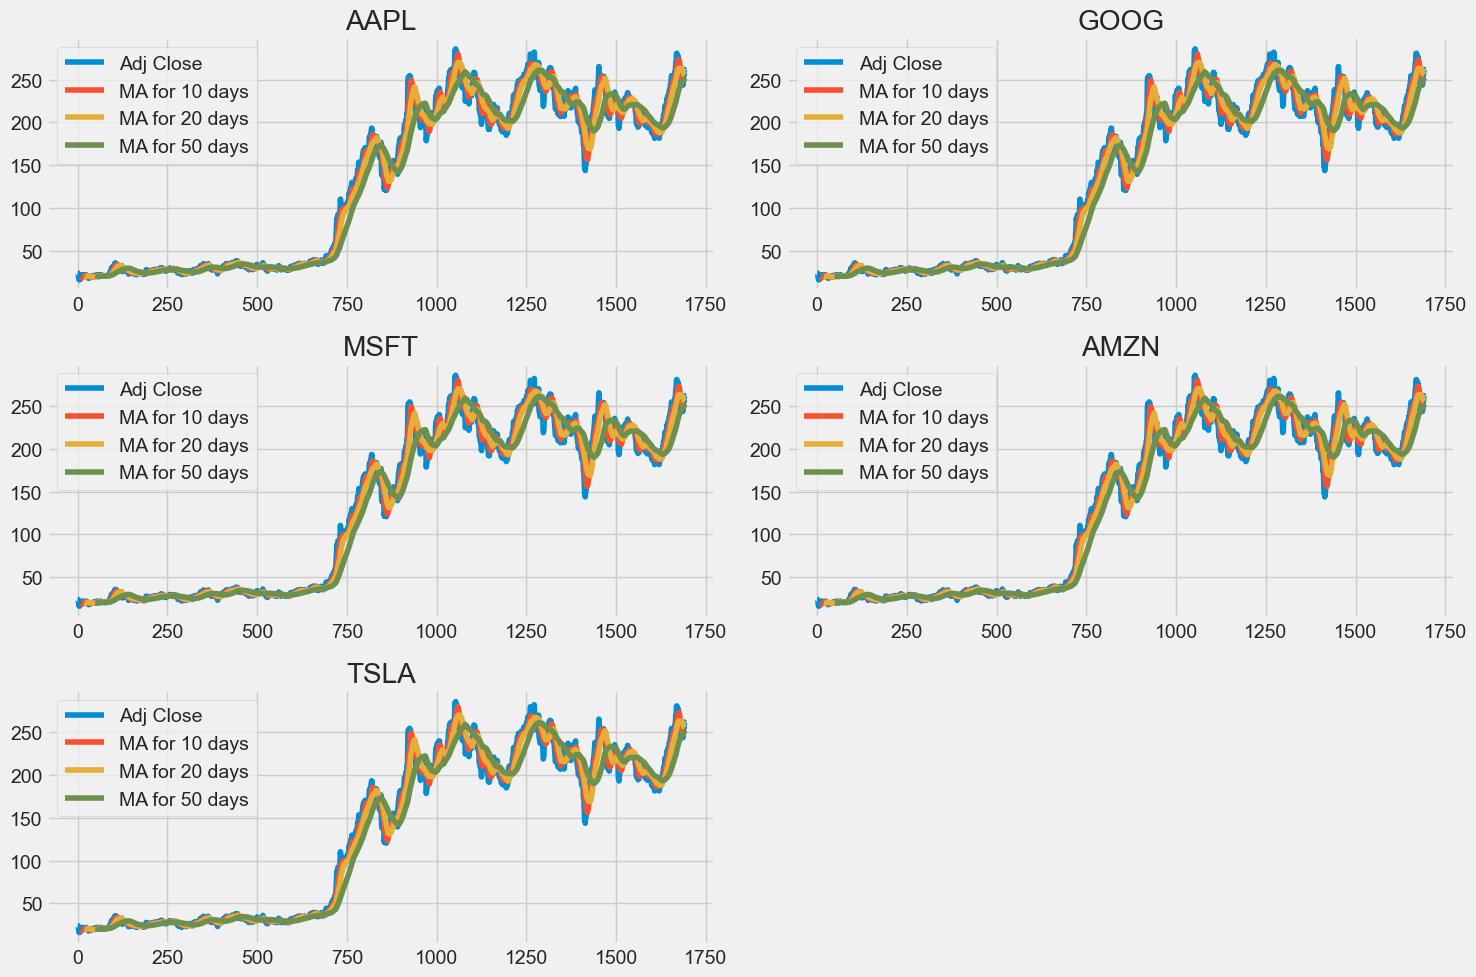

In [6]:
ma_day = [10, 20, 50]

# Calculate moving averages for each company
for ticker, company_df in pandas_dfs.items():
    for ma in ma_day:
        column_name = f"MA for {ma} days"
        company_df[column_name] = company_df['Adj Close'].rolling(ma).mean()

# Set up dynamic subplot grid
import math
num_plots = len(pandas_dfs)
cols = 2
rows = math.ceil(num_plots / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 10))

# Flatten axes for easier indexing in case of a non-rectangular grid
axes = axes.flatten()

# Plot data for each company
for i, (ticker, company_df) in enumerate(pandas_dfs.items()):
    company_df[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[i])
    axes[i].set_title(ticker)

# Remove any unused subplots
for j in range(len(pandas_dfs), len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

In [7]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

NameError: name 'company_list' is not defined

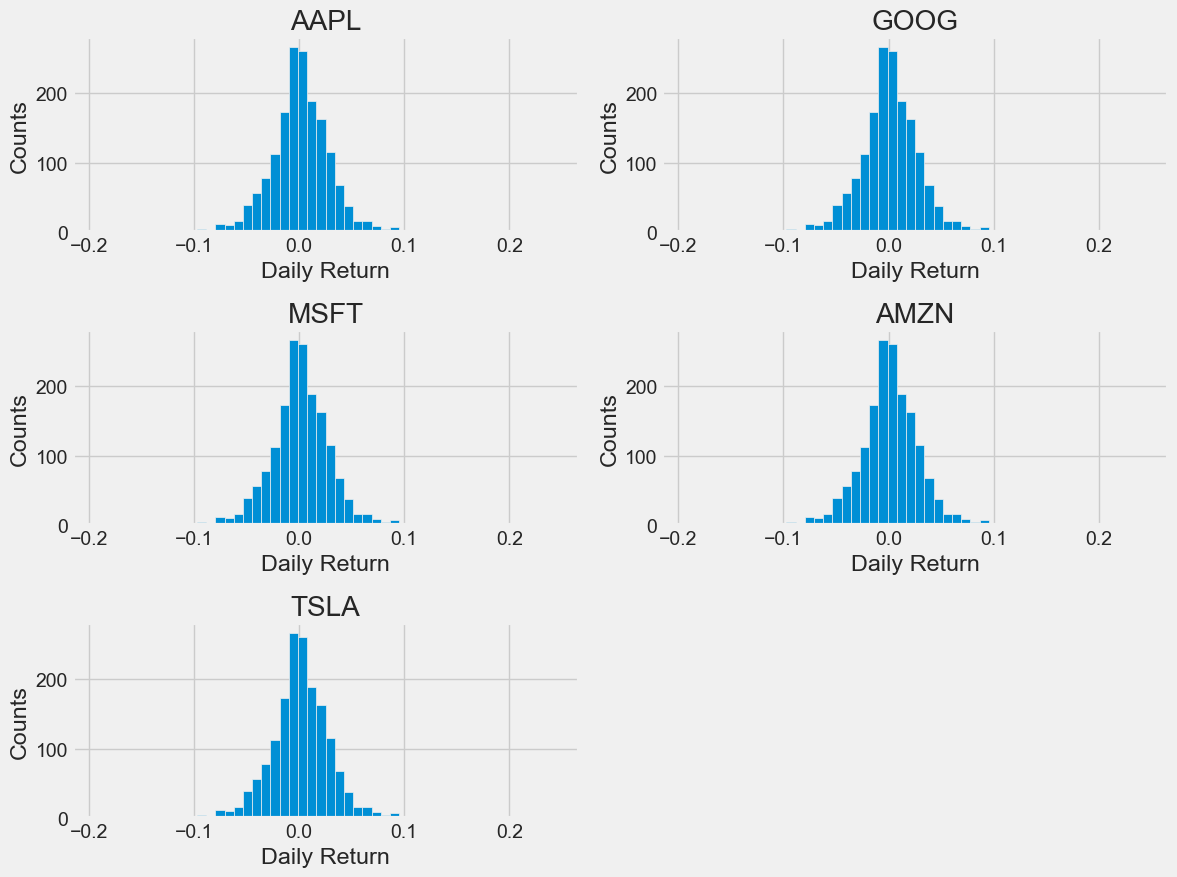

In [8]:
plt.figure(figsize=(12, 9))

# Add a 'Daily Return' column to each DataFrame
for ticker, company_df in pandas_dfs.items():
    company_df['Daily Return'] = company_df['Adj Close'].pct_change()

# Calculate the number of rows and columns for subplots dynamically
import math
num_plots = len(pandas_dfs)
cols = 2  # Fixed number of columns
rows = math.ceil(num_plots / cols)  # Dynamically calculate rows

# Plot histograms for daily returns
for i, (ticker, company_df) in enumerate(pandas_dfs.items(), 1):
    plt.subplot(rows, cols, i)
    company_df['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{ticker}')  # Use ticker as the title

plt.tight_layout()
plt.show()

In [9]:
# Create a DataFrame with closing prices for all stocks
closing_df = pd.DataFrame({ticker: df['Adj Close'] for ticker, df in pandas_dfs.items()})

# Create a new DataFrame for returns
tech_rets = closing_df.pct_change()

# Display the first few rows
tech_rets.head()

,AAPL,GOOG,MSFT,AMZN,TSLA
0,NaN,NaN,NaN,NaN,NaN
1,-0.002511,-0.002511,-0.002511,-0.002511,-0.002511
2,-0.078473,-0.078473,-0.078473,-0.078473,-0.078473
3,-0.125683,-0.125683,-0.125683,-0.125683,-0.125683
4,-0.160937,-0.160937,-0.160937,-0.160937,-0.160937


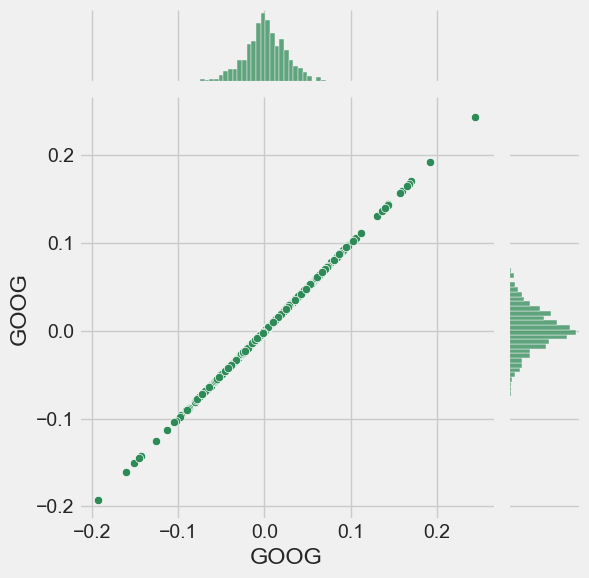

In [10]:
# Ensure 'GOOG' exists in the DataFrame
if 'GOOG' in tech_rets.columns:
    sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')
else:
    print("Error: 'GOOG' column not found in tech_rets DataFrame")

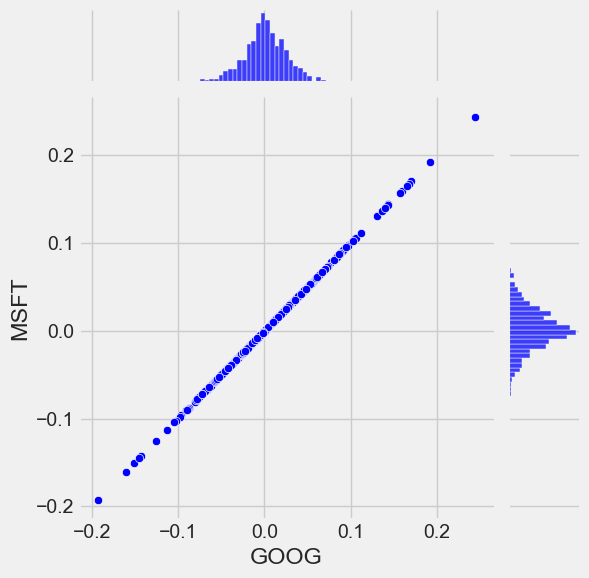

In [11]:
# Ensure 'GOOG' and 'MSFT' exist in the DataFrame
if 'GOOG' in tech_rets.columns and 'MSFT' in tech_rets.columns:
    # Create the jointplot
    sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter', color='blue')
else:
    print("Error: 'GOOG' or 'MSFT' column not found in tech_rets DataFrame")

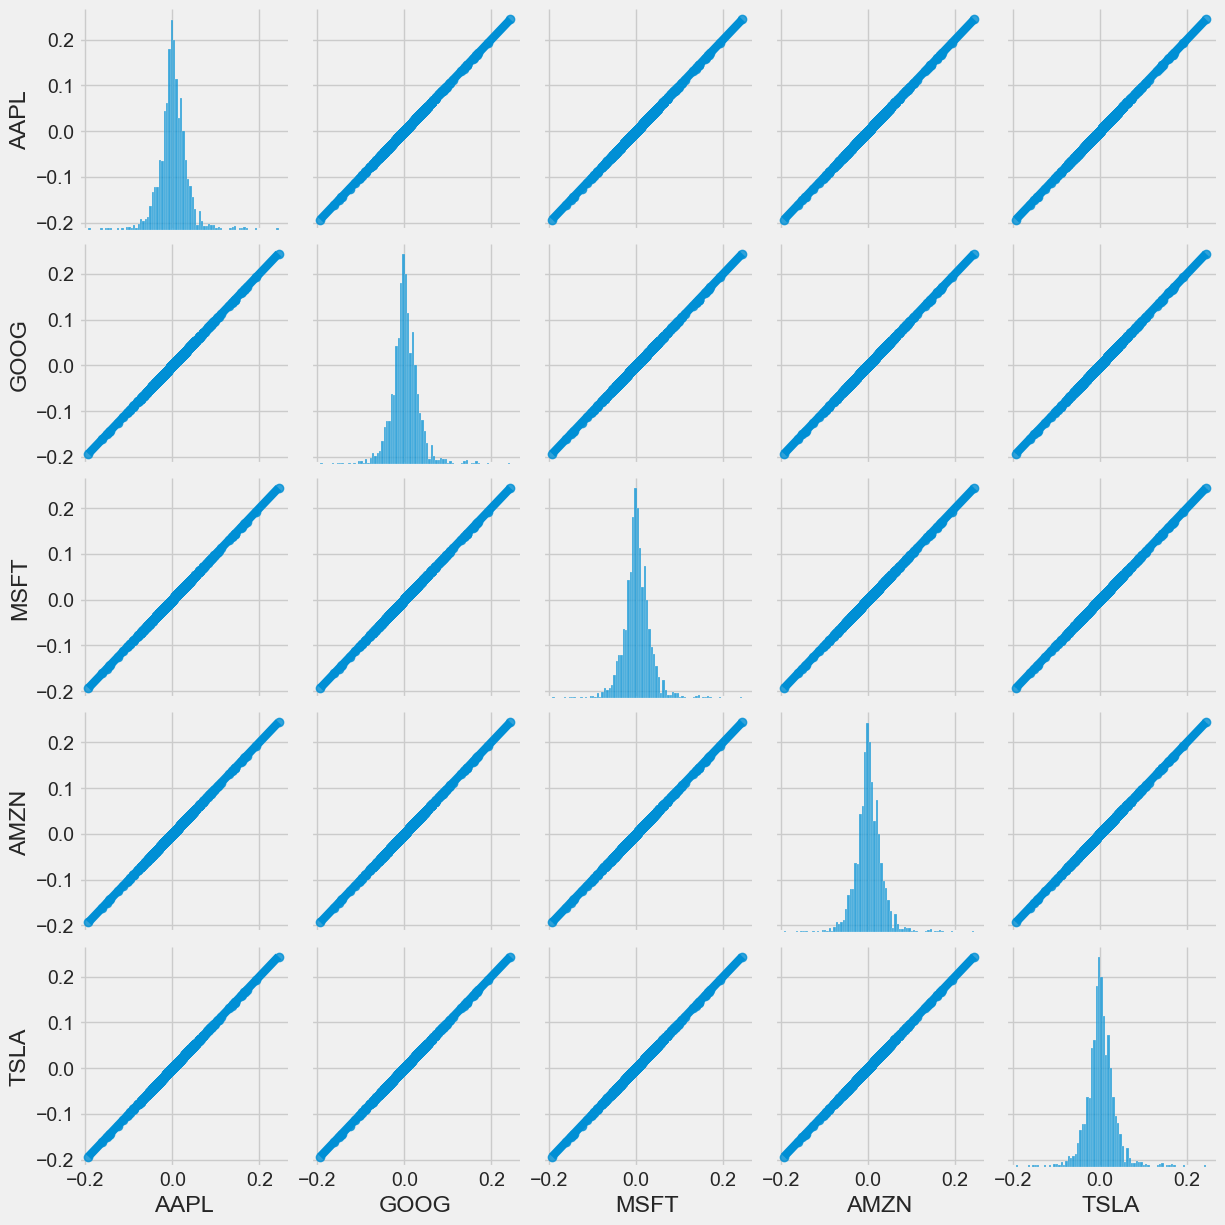

In [12]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets, kind='reg')

Text(0.5, 1.02, 'Pairwise Relationships of Daily Returns')

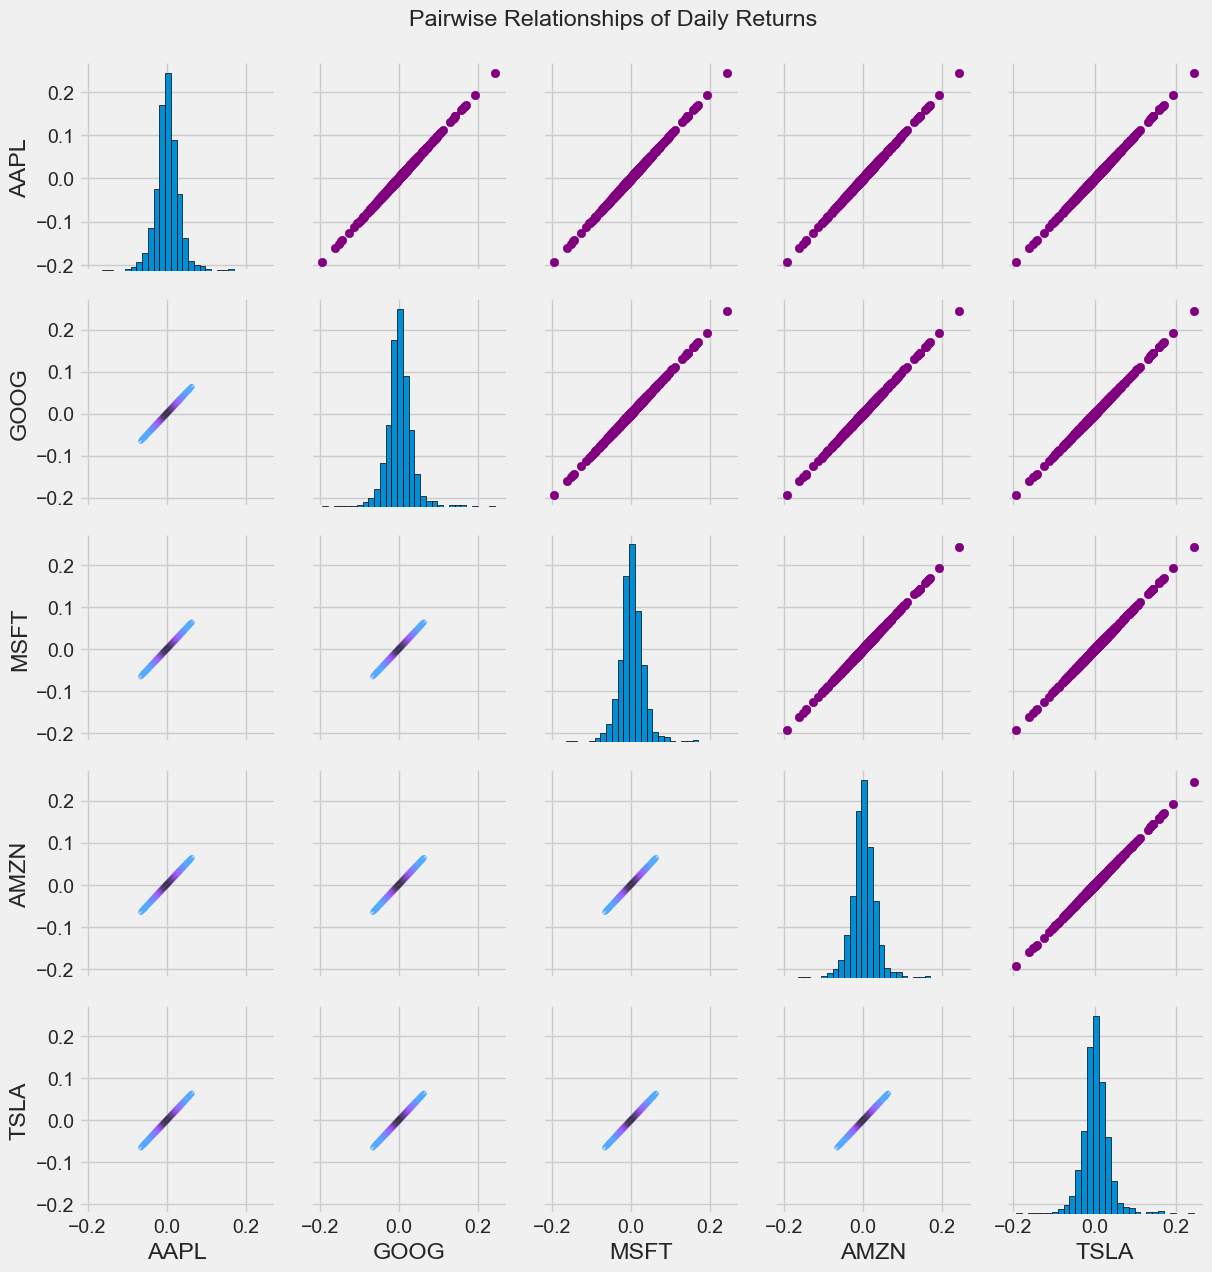

In [13]:
# Set up our figure by naming it returns_fig, call PairGrid on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper to specify what the upper triangle will look like
return_fig.map_upper(plt.scatter, color='purple')

# Define the lower triangle as a KDE plot with a cool colormap
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Define the diagonal as a series of histograms of daily returns
return_fig.map_diag(plt.hist, bins=30, edgecolor='k')

# Add titles and labels for clarity
return_fig.fig.suptitle("Pairwise Relationships of Daily Returns", y=1.02)

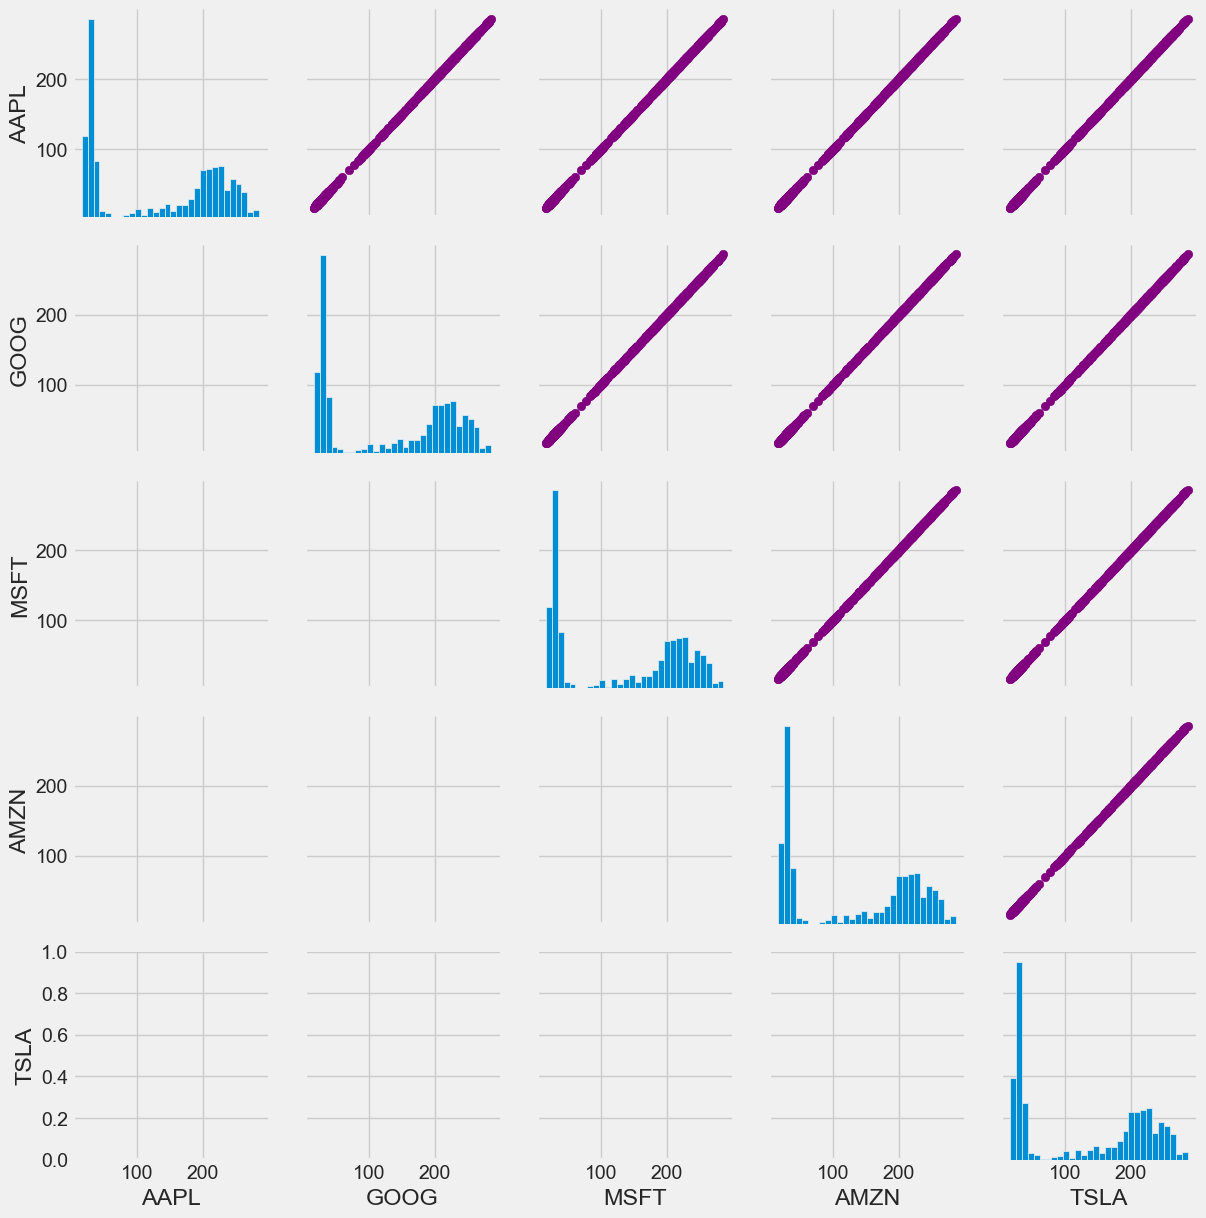

In [26]:
# Set up PairGrid on the cleaned DataFrame
returns_fig = sns.PairGrid(closing_df)

# Define the upper triangle
returns_fig.map_upper(plt.scatter, color='purple')

# Define the lower triangle
returns_fig.map_lower(sns.kdeplot, cmap='cool_d', warn_singular=False)

# Define the diagonal
returns_fig.map_diag(plt.hist, bins=30)

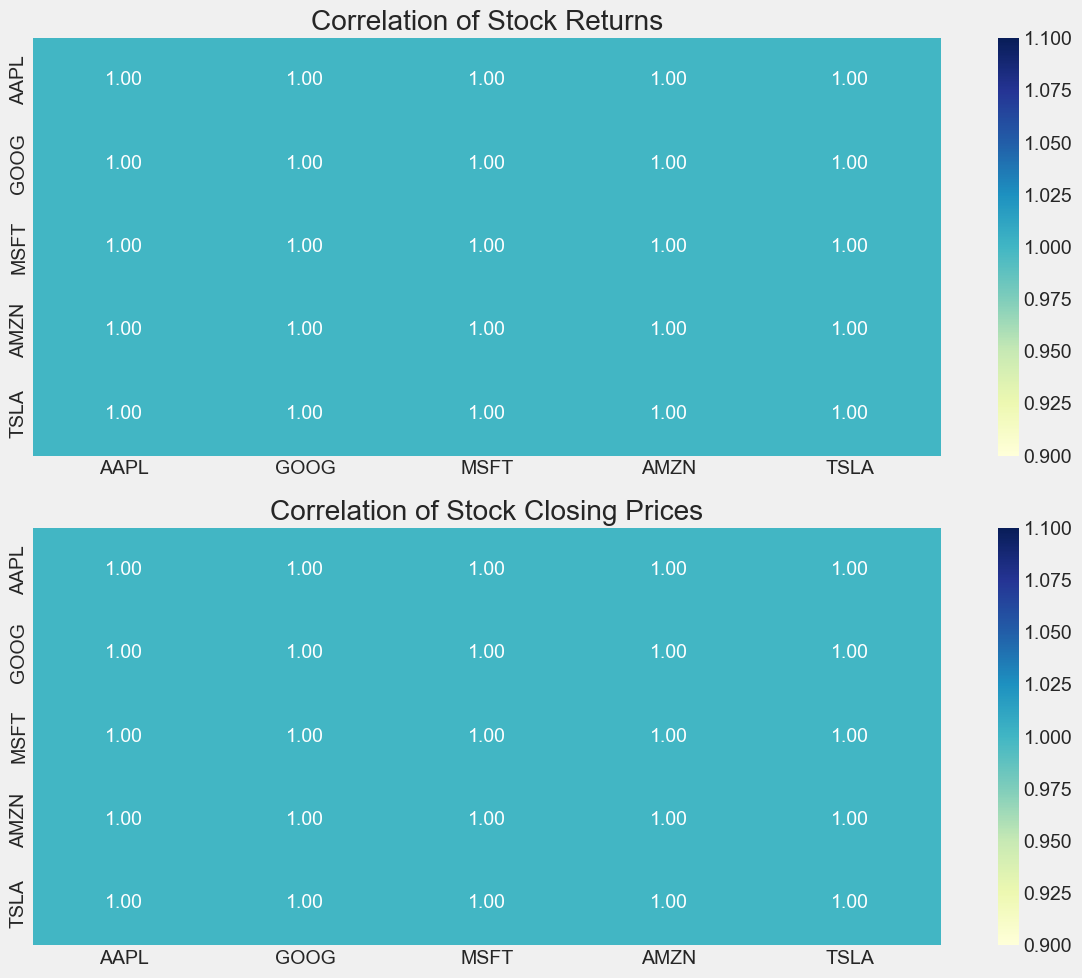

In [15]:
plt.figure(figsize=(12, 10))

# Plot 1: Correlation heatmap of stock returns
plt.subplot(2, 1, 1)  # Adjusting to have 2 rows and 1 column for better spacing
sns.heatmap(tech_rets.corr(), annot=True, cmap='YlGnBu', fmt=".2f", cbar=True)
plt.title('Correlation of Stock Returns')

# Plot 2: Correlation heatmap of stock closing prices
plt.subplot(2, 1, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='YlGnBu', fmt=".2f", cbar=True)
plt.title('Correlation of Stock Closing Prices')

plt.tight_layout()
plt.show()

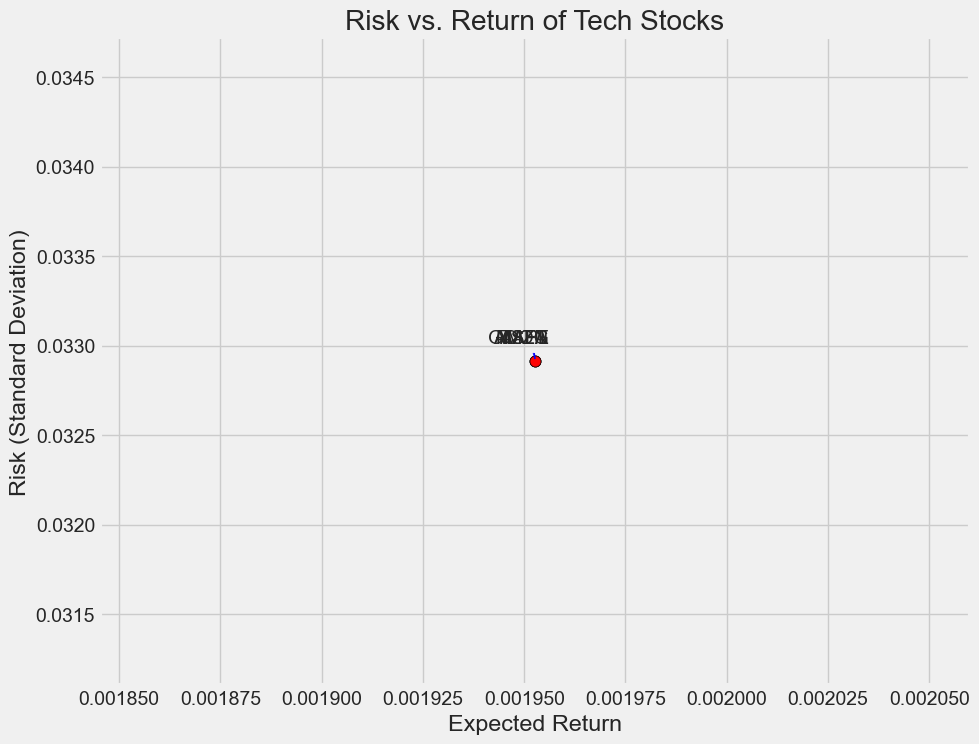

In [16]:
# Drop NaN values
rets = tech_rets.dropna()

# Area of the scatter points
area = np.pi * 20

plt.figure(figsize=(10, 8))

# Scatter plot of risk vs. return
plt.scatter(rets.mean(), rets.std(), s=area, alpha=0.6, color='red', edgecolors='k')
plt.xlabel('Expected Return')
plt.ylabel('Risk (Standard Deviation)')
plt.title('Risk vs. Return of Tech Stocks')

# Annotate each point
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy=(x, y), 
        xytext=(10, 10),  # Offset the annotation text slightly
        textcoords='offset points', 
        ha='right', 
        va='bottom', 
        arrowprops=dict(
            arrowstyle='-', 
            color='blue', 
            connectionstyle='arc3,rad=-0.3'
        )
    )

plt.grid(True)
plt.show()

In [17]:
import yfinance as yf
from datetime import datetime

# Get the stock quote
df = yf.download('AAPL', start='2012-01-01', end=datetime.now().strftime('%Y-%m-%d'))

# Check if the dataset is empty
if df.empty:
    raise ValueError("The downloaded dataset is empty!")

# Show the data
print("Downloaded dataset for AAPL:")
print(df)

[*********************100%***********************]  1 of 1 completed

Downloaded dataset for AAPL:
Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2012-01-03   12.388999   14.686786   14.732143   14.607143   14.621429   
2012-01-04   12.455575   14.765714   14.810000   14.617143   14.642857   
2012-01-05   12.593860   14.929643   14.948214   14.738214   14.819643   
2012-01-06   12.725510   15.085714   15.098214   14.972143   14.991786   
2012-01-09   12.705329   15.061786   15.276786   15.048214   15.196429   
...                ...         ...         ...         ...         ...   
2024-11-20  229.000000  229.000000  229.929993  225.889999  228.059998   
2024-11-21  228.520004  228.520004  230.160004  225.710007  228.880005   
2024-11-22  229.869995  229.869995  230.720001  228.059998  228.059998   
2024-11-25  232.869995  232.869995  233.250000  229.740005  231.460007   
2024-11-2

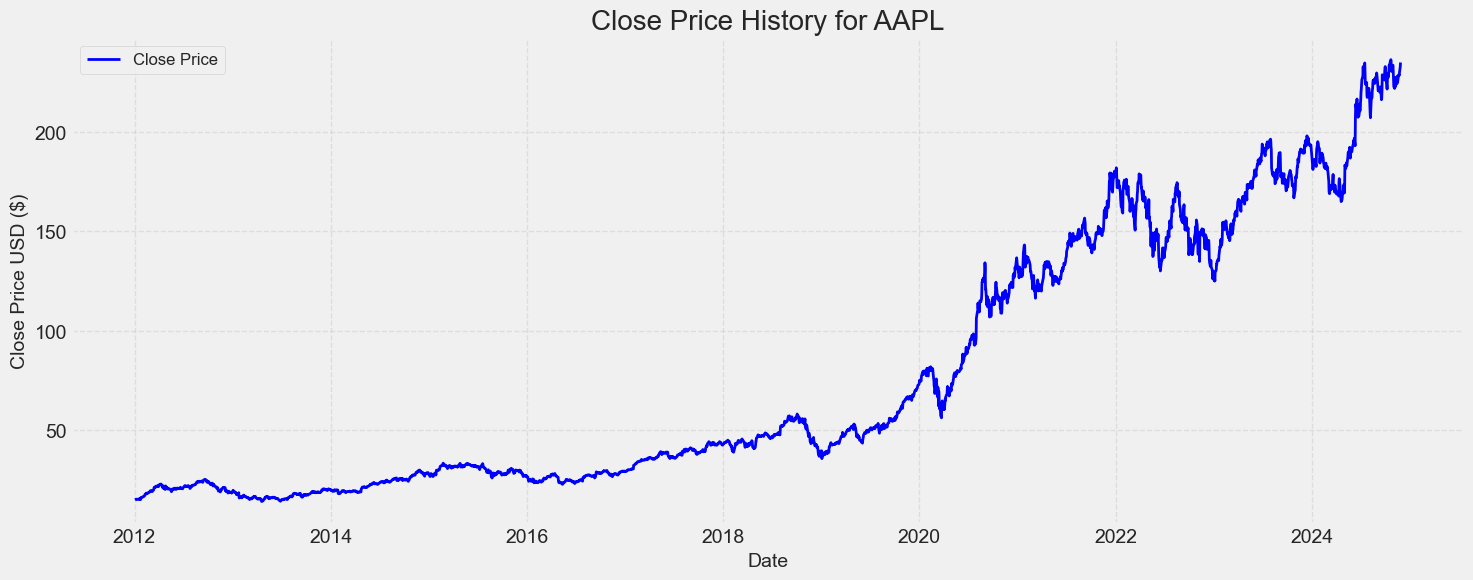

In [18]:
plt.figure(figsize=(16, 6))
plt.plot(df['Close'], label='Close Price', color='blue', linewidth=2)
plt.title('Close Price History for AAPL', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.show()

In [19]:
# Create a new DataFrame with only the 'Close' column
data = df[['Close']]

# Convert the DataFrame to a numpy array
dataset = data.values

# Check the dataset shape before scaling
print("Dataset shape before scaling:", dataset.shape)

# Calculate the number of rows to use for training (95% of the data)
training_data_len = int(np.ceil(len(dataset) * 0.95))

# Print the training data length
print("Training data length:", training_data_len)

Dataset shape before scaling: (3247, 1)
Training data length: 3085


In [20]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler with the range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the dataset
scaled_data = scaler.fit_transform(dataset)

# Print the shape of the scaled data for confirmation
print("Scaled data shape:", scaled_data.shape)

# Display the first few rows of the scaled data for verification
print("First 5 rows of scaled data:\n", scaled_data[:5])

Scaled data shape: (3247, 1)
First 5 rows of scaled data:
 [[0.00332215]
 [0.00367683]
 [0.00441348]
 [0.00511482]
 [0.00500729]]


In [21]:
# Create the training data set
# Use the first `training_data_len` rows for training
train_data = scaled_data[0:int(training_data_len), :]

# Initialize x_train and y_train
x_train = []
y_train = []

# Create sequences of 60 timesteps for training
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # Previous 60 timesteps as input
    y_train.append(train_data[i, 0])      # Current timestep as output/label
    if i <= 61:  # Debug the first two iterations
        print(f"x_train sample at index {i}:\n{x_train[-1]}")
        print(f"y_train sample at index {i}:\n{y_train[-1]}")
        print()

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape x_train to 3D for LSTM compatibility: (samples, timesteps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Print the shapes for verification
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train sample at index 60:
[0.00332215 0.00367683 0.00441348 0.00511482 0.00500729 0.00524963
 0.00513889 0.00495273 0.00469915 0.00548395 0.00619171 0.00597344
 0.00477779 0.00591888 0.00479545 0.00900831 0.00868252 0.00910782
 0.01002743 0.01058432 0.01053778 0.01036606 0.0110979  0.0117864
 0.01256638 0.01382623 0.01647271 0.01651284 0.01798614 0.0190871
 0.01719492 0.01792354 0.0179091  0.01995214 0.01966165 0.02019929
 0.02116544 0.02170309 0.02325182 0.02438006 0.02470586 0.02481981
 0.02289072 0.02242529 0.02249431 0.02430785 0.02481821 0.02591436
 0.02849824 0.03194558 0.0313004  0.03130201 0.03379442 0.03457441
 0.03401911 0.03351196 0.03298395 0.0347381  0.03594178 0.03644572]
y_train sample at index 60:
0.03520031440172121

x_train sample at index 61:
[0.00367683 0.00441348 0.00511482 0.00500729 0.00524963 0.00513889
 0.00495273 0.00469915 0.00548395 0.00619171 0.00597344 0.00477779
 0.00591888 0.00479545 0.00900831 0.00868252 0.00910782 0.01002743
 0.01058432 0.01053778 0.

In [22]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

# Build the LSTM model
model = Sequential()

# Input layer
model.add(Input(shape=(x_train.shape[1], 1)))  # Input shape: (timesteps, features)

# LSTM layers
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))

# Fully connected (Dense) layers
model.add(Dense(25, activation='relu'))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model for clarity
model.summary()

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0324
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 3.5242e-04
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 2.9268e-04
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 3.1833e-04
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 2.5524e-04
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 2.6704e-04
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 2.3600e-04
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 2.8798e-04
Epoch 9/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 2.3644e-04
Epoch 10/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 2.7033e-04


In [23]:
# Create the testing data set
# Create a new array containing scaled values from index training_data_len - 60 to the end
test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]  # Actual values (not scaled)

# Generate x_test sequences (lookback window of 60 timesteps)
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert x_test to a numpy array
x_test = np.array(x_test)

# Reshape x_test to 3D shape for LSTM model: (samples, timesteps, features)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions using the trained model
predictions = model.predict(x_test)

# Transform predictions back to original scale
predictions = scaler.inverse_transform(predictions)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print("Root Mean Squared Error (RMSE):", rmse)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Root Mean Squared Error (RMSE): 9.021634466397138


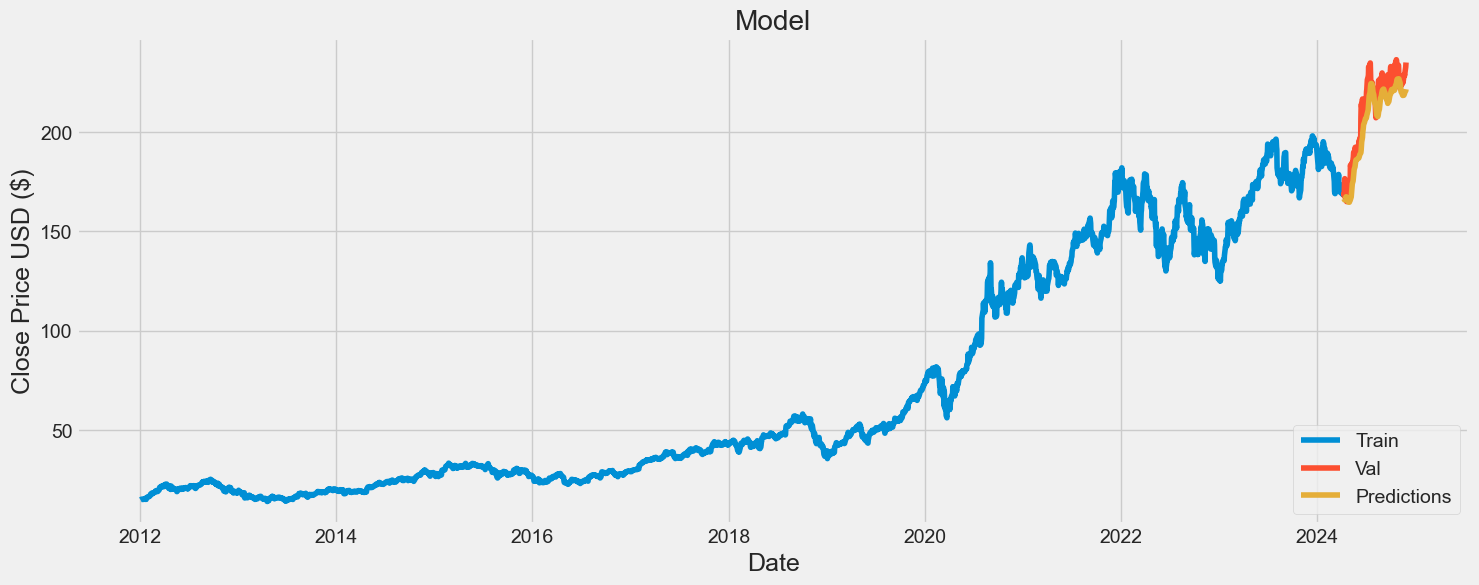

In [24]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid = data[training_data_len:].copy()
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [25]:
# Create a DataFrame to compare actual and predicted prices
valid = pd.DataFrame({
    "Actual": y_test.flatten(),
    "Predicted": predictions.flatten()
})

# Print the DataFrame
print("Valid DataFrame with Actual and Predicted Prices:")
print(valid)

# Optionally display the first few rows for verification
valid.head()

Valid DataFrame with Actual and Predicted Prices:
         Actual   Predicted
0    169.669998  166.457336
1    167.779999  166.187729
2    175.039993  165.855225
3    176.550003  166.082245
4    172.690002  166.695221
..          ...         ...
157  229.000000  219.225861
158  228.520004  219.726685
159  229.869995  220.220612
160  232.869995  220.795715
161  235.059998  221.598846

[162 rows x 2 columns]


,Actual,Predicted
0,169.669998,166.457336
1,167.779999,166.187729
2,175.039993,165.855225
3,176.550003,166.082245
4,172.690002,166.695221
